# **BUSINESS PROBLEM**

### *This Data Set contains about 92 German Stock Ticker and their relevant data from the period of 2015 till 2024 which I have downloaded from **YAHOO FINANCE (Yfinance)** as seen below. This mdl is a beginner's guide to take tips of Historical data and how the stocks have evolved and their past and current predictions based on available stock exchange data. While this is not entire prediction insight but can give you fundamental insights for your Historical analysis. As nowadays we have lot of tools to analyse shares, This will be an added assistant, an influential tool to give you some insights. Having said that stock market is alway combination of various analysis like historical , technical analysis and wide market reseach, and knowlede on several factors such as economy and experience.*

# **BEST MODEL: RNN (GRU)**

### Libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Loading and Cleaning Data

In [2]:
#Data Set


# list of German stock tickers
tickers = [
    "ADS.DE", "ALV.DE", "BAS.DE", "BAYN.DE", "BMW.DE", "CON.DE", "DB1.DE", "DBK.DE", "DTE.DE", "DWNI.DE",
    "EOAN.DE", "FME.DE", "FRE.DE", "HEI.DE", "HEN3.DE", "IFX.DE", "LIN.DE", "MRK.DE", "MUV2.DE", "RWE.DE",
    "SAP.DE", "SIE.DE", "VNA.DE", "VOW3.DE", "1COV.DE", "AIXA.DE", "B4B.DE", "BEI.DE", "BNR.DE", "BVB.DE",
    "BYW6.DE", "CBK.DE", "COK.DE", "COP.DE", "CWC.DE", "DEQ.DE", "DUE.DE", "EVT.DE", "FNTN.DE", "FPE3.DE",
    "FPH.DE", "FRA.DE", "FTK.DE", "G1A.DE", "G24.DE", "GIB.DE", "GLJ.DE", "GSC1.DE", "HAW.DE", "HLAG.DE",
    "HNR1.DE", "KRN.DE", "KWS.DE", "LXS.DE", "MDG1.DE", "MTX.DE", "NDX1.DE", "NOEJ.DE", "PFV.DE", "PNE3.DE",
    "PSM.DE", "QIA.DE", "RRTL.DE", "SANT.DE", "SBS.DE", "SDF.DE", "SHL.DE", "SHR.DE", "SKB.DE", "SRT3.DE",
    "SZG.DE", "TEG.DE", "TKA.DE", "TUI1.DE", "UTDI.DE", "V3V.DE", "VBK.DE", "VIB3.DE", "VOS.DE", "WAF.DE",
    "WDP.DE", "ZAL.DE", "ZIL2.DE", "ZO1.DE", "AOX.DE", "EVD.DE", "GFT.DE", "LHA.DE", "NDA.DE", "PBB.DE", "SGL.DE"
]


data = []


def fetch_data(ticker):
    try:
        # Fetching data from Yahoo Finance
        data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
        
      
        data.reset_index(inplace=True)

        
        if not data.empty and data.shape[0] >= 252:  # Assuming 252 trading days in a year
            # Check if all required columns are present
            required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
            if all(col in data.columns for col in required_columns):
                # Add 'Ticker' column
                data['Ticker'] = ticker
                # Fetch name from Yahoo Finance
                data['Name'] = yf.Ticker(ticker).info['longName']
                return data
            else:
                print(f"Missing required columns for {ticker}. Columns found: {data.columns}")
                return None
        else:
            print(f"Insufficient data for {ticker}. Expected at least 252 days, got {data.shape[0]} days.")
            return None

    except yf.YFInvalidPeriodError as e:
        print(f"Invalid period error for {ticker}: {e}")
        return None

    except yf.YFChartError as e:
        print(f"Chart error for {ticker}: {e}")
        return None

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Fetching data for all tickers
dataframes = [fetch_data(ticker) for ticker in tickers]


dataframes = [df for df in dataframes if df is not None]


if dataframes:
  
    cbd = pd.concat(dataframes)
    
   
    print(cbd.head(10))

else:
    print("No data available for the selected tickers.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2015-01-02  57.720001  57.860001  56.250000  56.419998  49.872494   964265   
1 2015-01-05  56.270000  56.799999  54.700001  54.750000  48.396290  1567689   
2 2015-01-06  54.590000  55.430000  53.799999  54.610001  48.272541  1281126   
3 2015-01-07  55.000000  55.380001  54.619999  55.160000  48.758713  1111281   
4 2015-01-08  55.650002  57.180000  55.630001  56.980000  50.367500  1283112   
5 2015-01-09  56.750000  57.650002  56.529999  56.820000  50.226074  1538929   
6 2015-01-12  56.619999  57.160000  55.930000  56.590000  50.022766   900223   
7 2015-01-13  56.150002  56.639999  55.869999  56.299999  49.766422  1372290   
8 2015-01-14  56.000000  56.049999  54.919998  55.450001  49.015060  1079884   
9 2015-01-15  55.849998  56.410000  54.400002  56.410000  49.863647  2277974   

   Ticker       Name  
0  ADS.DE  adidas AG  
1  ADS.DE  adidas AG  
2  ADS.DE  adidas AG  
3  ADS.DE  adidas AG  
4  A

In [3]:
df = pd.DataFrame(cbd)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 203584 entries, 0 to 2287
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       203584 non-null  datetime64[ns]
 1   Open       203584 non-null  float64       
 2   High       203584 non-null  float64       
 3   Low        203584 non-null  float64       
 4   Close      203584 non-null  float64       
 5   Adj Close  203584 non-null  float64       
 6   Volume     203584 non-null  int64         
 7   Ticker     203584 non-null  object        
 8   Name       203584 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 15.5+ MB
None


### Data set from Y finance

In [5]:
df.to_csv('yahoo_finance_data.csv')

In [6]:
df = pd.read_csv('yahoo_finance_data.csv')

In [7]:
df = pd.DataFrame(df)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Name
0,0,2015-01-02,57.720001,57.860001,56.250000,56.419998,49.872494,964265,ADS.DE,adidas AG
1,1,2015-01-05,56.270000,56.799999,54.700001,54.750000,48.396290,1567689,ADS.DE,adidas AG
2,2,2015-01-06,54.590000,55.430000,53.799999,54.610001,48.272541,1281126,ADS.DE,adidas AG
3,3,2015-01-07,55.000000,55.380001,54.619999,55.160000,48.758713,1111281,ADS.DE,adidas AG
4,4,2015-01-08,55.650002,57.180000,55.630001,56.980000,50.367500,1283112,ADS.DE,adidas AG
...,...,...,...,...,...,...,...,...,...,...
203579,2283,2023-12-21,6.510000,6.560000,6.430000,6.525000,6.525000,111933,SGL.DE,SGL Carbon SE
203580,2284,2023-12-22,6.495000,6.525000,6.380000,6.445000,6.445000,67290,SGL.DE,SGL Carbon SE
203581,2285,2023-12-27,6.460000,6.525000,6.420000,6.450000,6.450000,66579,SGL.DE,SGL Carbon SE
203582,2286,2023-12-28,6.500000,6.600000,6.415000,6.470000,6.470000,102597,SGL.DE,SGL Carbon SE


## Data Preprocessing

### Null Values Check

In [10]:
print("Null values:", df.isnull().values.sum())
print("NA values:", df.isna().values.any())

Null values: 0
NA values: False


### Pick **ADIDAS** Stock

In [11]:
ticker = 'ADS.DE'
df = df[df['Ticker'] == ticker]

In [12]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,2288.00000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2.288000e+03
mean,1143.50000,188.559213,190.745677,186.385236,188.567894,180.350113,7.559092e+05
std,660.63303,68.167706,68.804674,67.433939,68.067054,67.461679,5.093008e+05
min,0.00000,54.590000,55.380001,53.799999,54.610001,48.272541,0.000000e+00
25%,571.75000,145.795002,147.224998,144.270000,145.980000,137.376640,4.817482e+05
50%,1143.50000,184.820007,186.785004,182.949997,184.450005,176.345612,6.282015e+05
75%,1715.25000,250.649994,254.325001,247.687496,250.700005,242.346989,8.853050e+05
max,2287.00000,325.750000,336.250000,324.899994,336.250000,327.720184,9.908728e+06


In [13]:
rdf = df.reset_index()

In [14]:
# Now access 'Date' and 'Close' columns
Clprdf = rdf[['Date', 'Close']]
Clprdf.shape

(2288, 2)

### *for Adidas Stock, the prediction for seasonal trend can be done as high as from 2020, we do not need long term data as we are prediction for seasonal trend not very long term investments*

In [15]:
Clprdf = Clprdf[Clprdf['Date'] > '2020-01-1']
Clstk = Clprdf.copy()
Clprdf.shape[0]

1015

## Scale Data

In [16]:
del Clprdf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
Clprdf=scaler.fit_transform(np.array(Clprdf).reshape(-1,1))
Clprdf.shape

(1015, 1)

## Split Data

## *Data is split to train, test and validation*

In [17]:
TS = len(Clprdf)
TrS = int(TS * 0.70)
valsz = int(TS * 0.15)
test_size = TS - TrS - valsz

# Split the DataFrame
trd = Clprdf[0:TrS]
vld = Clprdf[TrS:TrS + valsz]
tsd = Clprdf[TrS + valsz:]

# Print the shapes of the resulting datasets
print("trd: ", trd.shape)
print("vld: ", vld.shape)
print("tsd: ", tsd.shape)

trd:  (710, 1)
vld:  (152, 1)
tsd:  (153, 1)


## Create Data Set Sequence for the model fitting 

### *The idea is to create set of sequence of input to predict next value in time series*. This gives us the target variable as X and Y.

In [18]:
# convert an array of values into a dataset matrix
def dtst(dataset, time_step=1):
    dX, dY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dX.append(a)
        dY.append(dataset[i + time_step, 0])
    return np.array(dX), np.array(dY)

In [19]:
def dtst(dataset, time_step=1):
    dX, dY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dX.append(a)
        dY.append(dataset[i + time_step, 0])
    return np.array(dX), np.array(dY)

In [20]:
time_step = 15
Xtr, ytr = dtst(trd, time_step)
yval, y_val = dtst(vld, time_step)
Xts, yts = dtst(tsd, time_step)

print("Xtr: ", Xtr.shape)
print("ytr: ", ytr.shape)
print("yval: ", yval.shape)
print("y_val: ", y_val.shape)
print("Xts: ", Xts.shape)
print("yts", yts.shape)

Xtr:  (694, 15)
ytr:  (694,)
yval:  (136, 15)
y_val:  (136,)
Xts:  (137, 15)
yts (137,)


## Train , Test, Validation Data Set

In [21]:
time_step = 15
Xtr =Xtr.reshape(Xtr.shape[0],Xtr.shape[1] , 1)
yval=yval.reshape(yval.shape[0],Xtr.shape[1] , 1)
Xts = Xts.reshape(Xts.shape[0],Xts.shape[1] , 1)

print("Xtr: ", Xtr.shape)
print("yval: ", yval.shape)
print("Xts: ", Xts.shape)

Xtr:  (694, 15, 1)
yval:  (136, 15, 1)
Xts:  (137, 15, 1)


## ### Train model

In [22]:
tf.keras.backend.clear_session()
mdl=Sequential()
mdl.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
mdl.add(GRU(32,return_sequences=True))
mdl.add(GRU(32))
mdl.add(Dropout(0.20))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\icath\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
mdl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 15, 32)              │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 15, 32)              │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,065 (62.75 KB)

 Trainable params: 16,065 (62.75 KB)

 Non-trainable params: 0 (0.00 B)

## *I have taken 200 Epochs , as my previous trails did not bring desired results from anything less than that*

In [ ]:
his = mdl.fit(Xtr,ytr,validation_data=(Xts,yts),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.1595 - val_loss: 0.0042
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0180 - val_loss: 0.0093
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0125 - val_loss: 0.0027
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0085 - val_loss: 5.3251e-04
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - val_loss: 4.1142e-04
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - val_loss: 5.2149e-04
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 5.4969e-04
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055 - val_loss: 4.6252e-04
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 6.0631e-04
Epoch 10/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 8.4032e-04
Epoch 11/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - val_loss: 3.6104e-04
Epoch 12/200
22/22 ━

## Step 5: Evaluate the model

### *Chart showing Validation loss* 

In [ ]:
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

## Make Predictions

In [ ]:
### Lets find the predicted values and check performance metrics
prdtr=mdl.predict(Xtr)
prdts=mdl.predict(Xts)
prdtr.shape, prdts.shape

In [ ]:
# Inverse Transform

prdtr = scaler.inverse_transform(prdtr)
prdts = scaler.inverse_transform(prdts)
ogytr = scaler.inverse_transform(ytr.reshape(-1,1)) 
ogyts = scaler.inverse_transform(yts.reshape(-1,1)) 

### Evaluation metrices RMSE and MAE

In [ ]:

print("Train data RMSE: ", math.sqrt(mean_squared_error(ogytr,prdtr)))
print("Train data MSE: ", mean_squared_error(ogytr,prdtr))
print("Train data MAE: ", mean_absolute_error(ogytr,prdtr))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(ogyts,prdts)))
print("Test data MSE: ", mean_squared_error(ogyts,prdts))
print("Test data MAE: ", mean_absolute_error(ogyts,prdts))

### *Though there are minor some issues in Train data , the mdl seems to perform in test data well. However, this result still has area for improvement in future on the error reduction, mdl fit which can be emphasized further.*

In [ ]:
print("Train data R2 score:", r2_score(ogytr, prdtr))
print("Test data R2 score:", r2_score(ogyts, prdts))

## Visualize Predictions vs Actuals 

In [ ]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ogyts, label='Actual')
plt.plot(prdts, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **TRIALS**

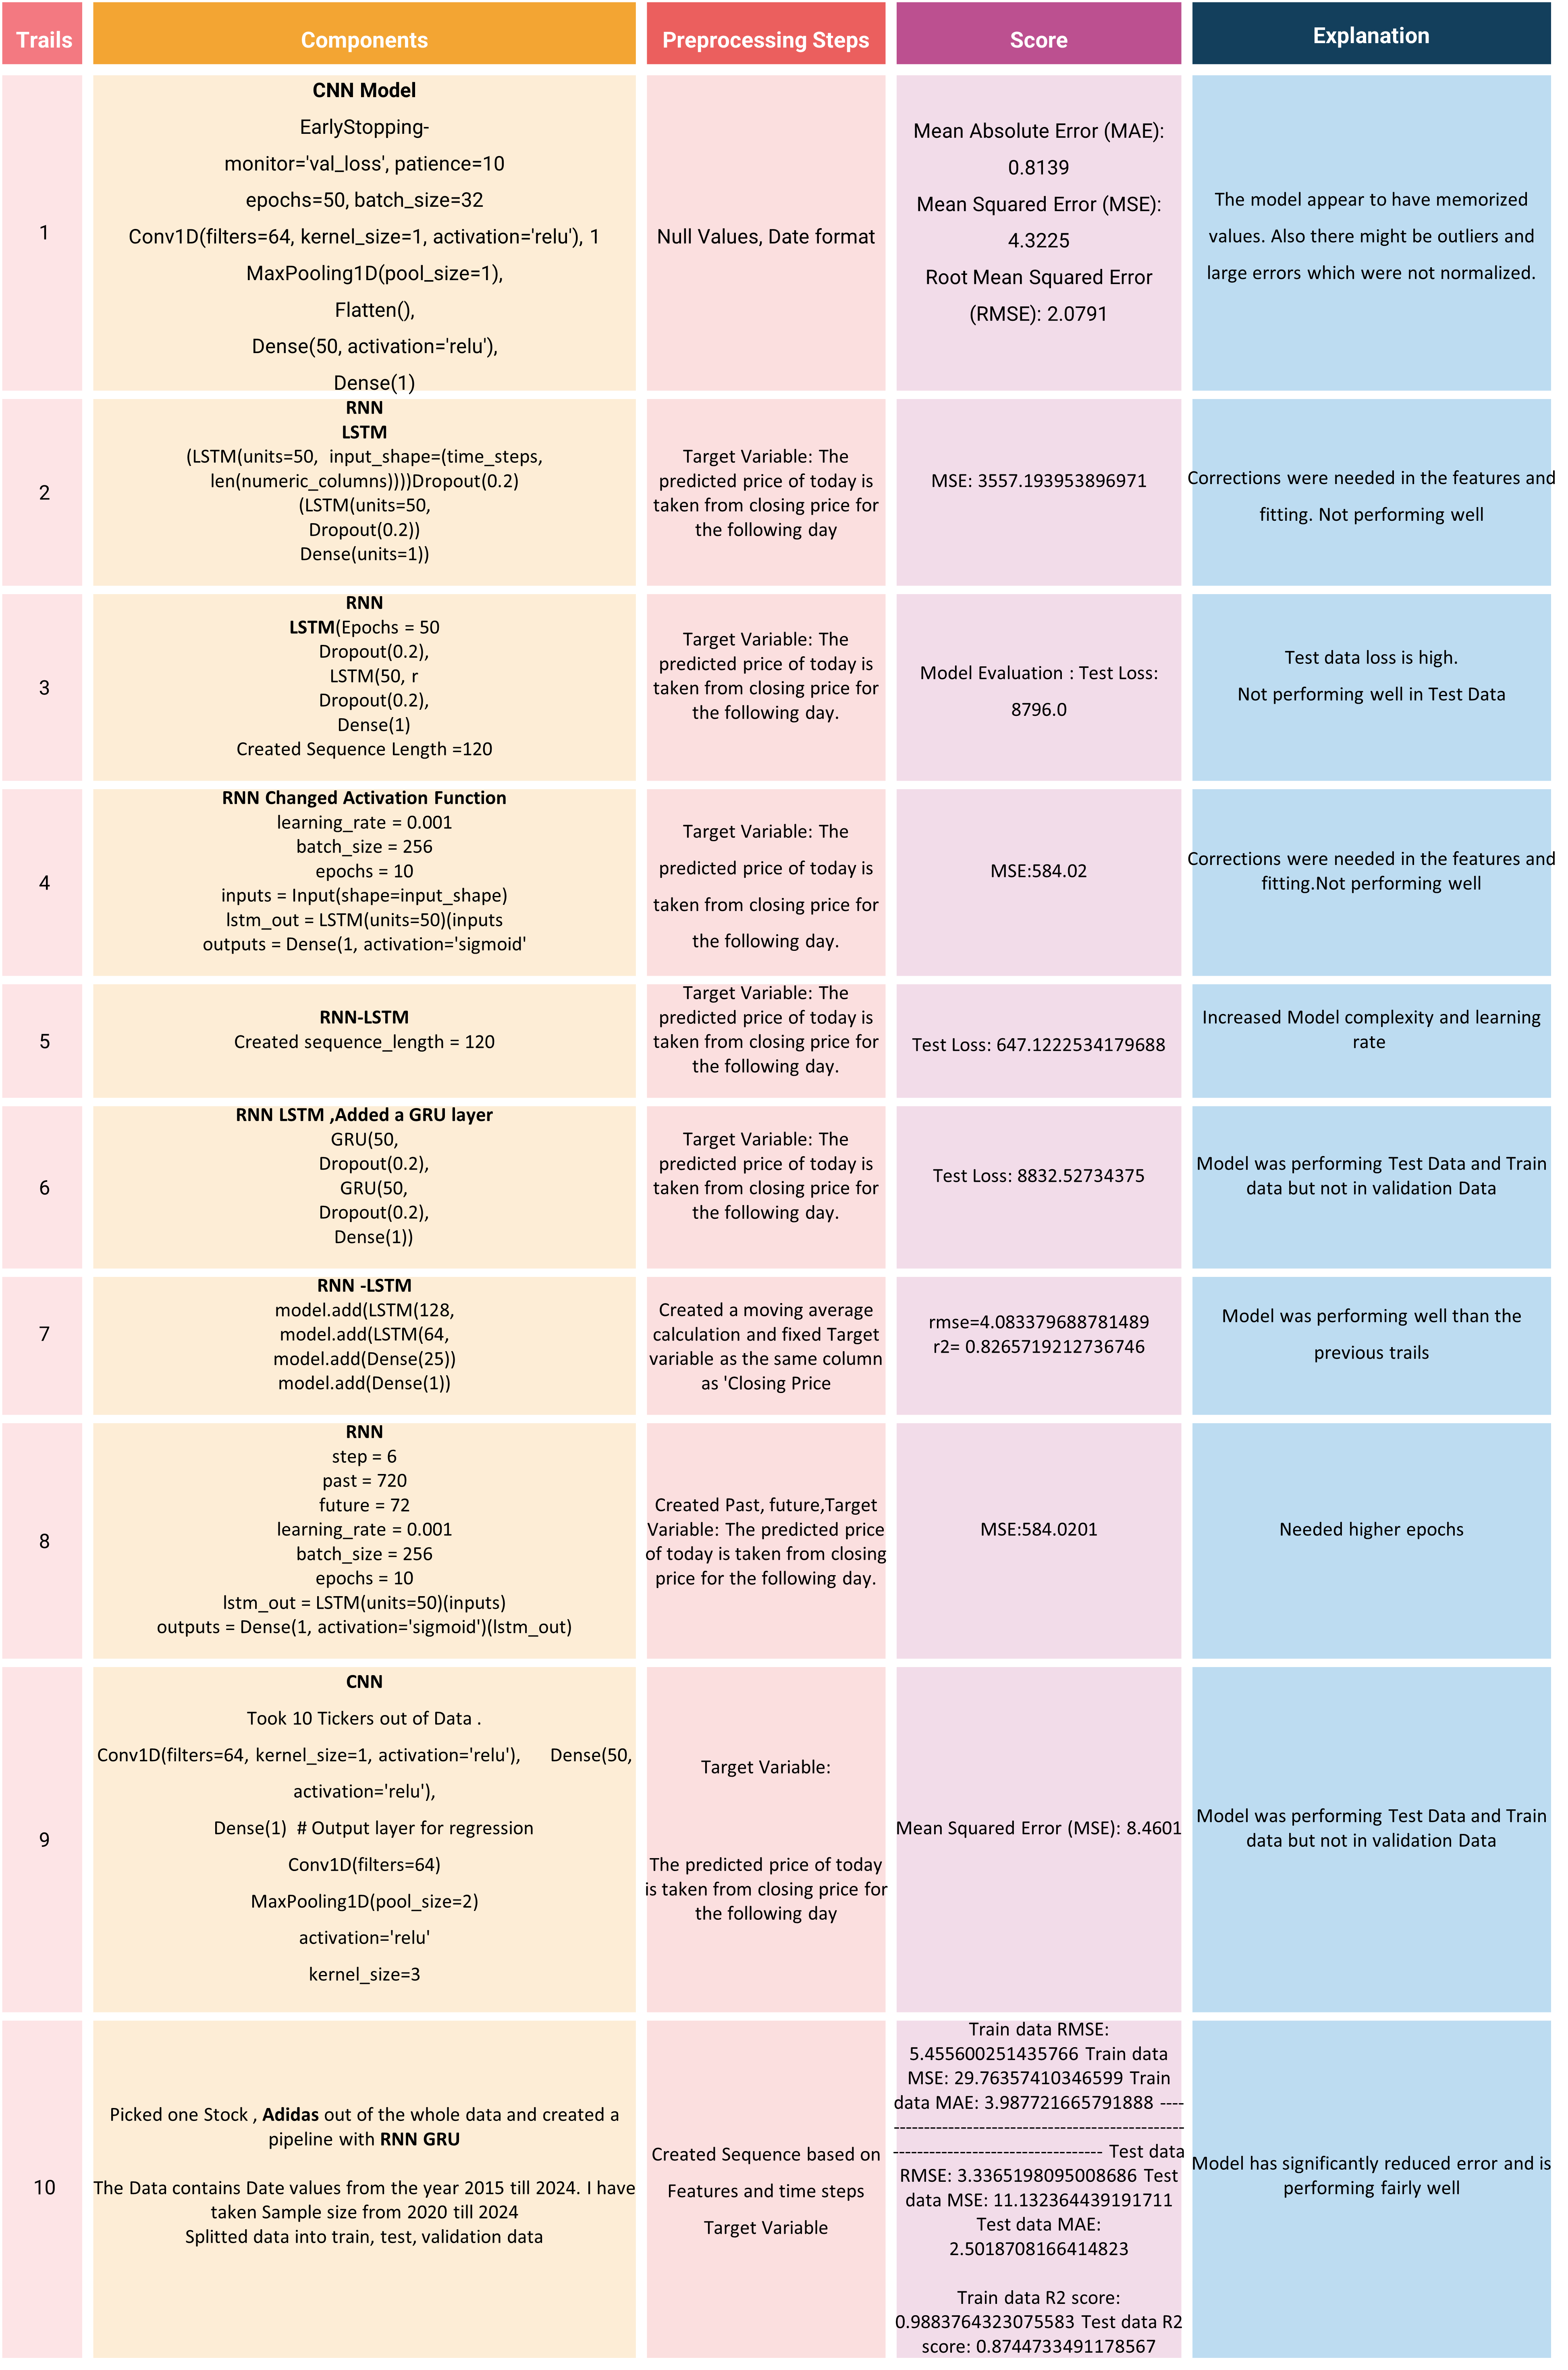